# Notebook 2

## 1.

In [12]:
def base(a):
    b=len(str(a))-1
    c=1
    a=str(a)
    answer_ten=0
    answer_two=0
    answer_eight=0
    answer_sixteen=0
    for i in range(b):
        answer_ten=answer_ten+(int(a[i])*10**c)
        c=c-1
    c=1
    for i in range(b):
        answer_two=answer_two+(int(a[i])*2**c)
        c=c-1
    c=1
    for i in range(b):
        answer_eight=answer_eight+(int(a[i])*8**c)
        c=c-1
    c=1
    for i in range(b):
        answer_sixteen=answer_sixteen+(int(a[i])*16**c)
        c=c-1      
    return answer_ten, answer_two, answer_eight, answer_sixteen

## 2.

In [13]:
import pandas as pd
address=r'/Users/nnussbaum/Ariel/Year 1 - 1/cast.csv'
cast=pd.read_csv(address)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


## 2.1. How many movies have the title "Hamlet"?

In [14]:
x=cast[cast.title=='Hamlet'].drop_duplicates(subset=['year'])
x.title.count()

17

## 2.2. List all of the "Treasure Island" movies from earliest to most recent

In [16]:
Treasure_Island=cast[cast.title == 'Treasure Island'].drop_duplicates(subset=['year'])
Treasure_Island=Treasure_Island.sort_values('year',ascending=True)
Treasure_Island

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


## 2.3 How many roles were credited in the silent 1921 version of Hamlet?

In [18]:
Hamlet=cast[cast.title=='Hamlet']
(Hamlet.year == 1921).sum()

9

## 2.4. Use groupby() to plot the number of "Hamlet" films made each decade

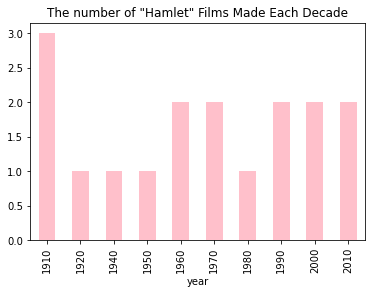

In [19]:
Hamlet1 = cast[cast.title=='Hamlet'].drop_duplicates(subset=['year'])
Hamlet1.groupby(Hamlet.year // 10 * 10).size().plot(kind='bar' , color='Pink' , title='The number of "Hamlet" Films Made Each Decade')

## 2.5. How many leading (n=1) roles were available to actors, and how many to
## actresses, in each year of the 1950s?

In [20]:
roles = cast[(cast.n == 1.0)&(cast.year >= 1950)&(cast.year < 1960)]
pd.DataFrame(roles.groupby(['year','type']).size())

0
year type        
1950 actor    604
     actress  271
1951 actor    633
     actress  272
1952 actor    591
     actress  284
1953 actor    634
     actress  290
1954 actor    626
     actress  298
1955 actor    606
     actress  264
1956 actor    614
     actress  288
1957 actor    708
     actress  284
1958 actor    694
     actress  275
1959 actor    678
     actress  287

## 2.6. List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [21]:
actors = cast[(cast.n == 1.0)&(cast.year >= 1990)]
actors1 = actors.groupby(actors.name).size()
pd.DataFrame(actors1.sort_values(ascending=False).head(10))

,0
name,
Mohanlal,126
Mammootty,118
Akshay Kumar,87
Jayaram,76
Andy Lau,72
Ajay Devgn,69
Eric Roberts,68
Amitabh Bachchan,68
Nagarjuna Akkineni,60


## 2.7. List, in order by year, each of the films in which Frank Oz has played more than
## one role

In [22]:
frank = cast[cast.name=='Frank Oz']
frank = frank.groupby(['year','title']).size()
frank = frank[frank >1]
pd.DataFrame(frank)

0
year title                                      
1979 The Muppet Movie                          8
1981 An American Werewolf in London            2
     The Great Muppet Caper                    6
1982 The Dark Crystal                          2
1984 The Muppets Take Manhattan                7
1985 Sesame Street Presents: Follow that Bird  3
1992 The Muppet Christmas Carol                7
1996 Muppet Treasure Island                    4
1999 Muppets from Space                        4
     The Adventures of Elmo in Grouchland      3